<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

I want to figure out if there is any relationship between income and SAT scores?

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT is a standardized test that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). T
* [SAT](https://collegereadiness.collegeboard.org/sat)

### Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [California School District Areas 2018-19](https://gis.data.ca.gov/datasets/e9476c422f0842a7a38652aaf4c7597c_0): Authoritative geographic data source for all schools' district area boundaries in California for the 2018-19 academic year

### Outside Research

##### Firstly, I found a district map file so I can plot the data for each school district. I also find a income map in CA for different areas.

In [1]:
# Mean Function:
def mean(num_list):
    total_num = len(num_list)
    total = sum(num_list)
    
    return total/total_num

In [2]:
# STD Function:
def std(num_list):
    sum_var_sqr = 0
    the_mean = mean(num_list)
    
    for i in num_list:
        sum_var_sqr += (i-the_mean)**2
    
    return (sum_var_sqr/len(num_list))**(1/2)

In [3]:
# Data cleaning function
def per_to_float(per):
    return float(per[:-1]) / 100

--- 
# Part 2

Libraries

---

In [4]:
# Imports:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

## Data Import and Cleaning

### Data Import & Cleaning

In [62]:
ca_sat_2019 = pd.read_csv('../data/sat_2019_ca.csv')

In [59]:
ca_sat_2019.head(3)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN


In [60]:
ca_sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
CDS                      2579 non-null float64
CCode                    2579 non-null float64
CDCode                   2579 non-null float64
SCode                    2579 non-null float64
RType                    2579 non-null object
SName                    1982 non-null object
DName                    2521 non-null object
CName                    2579 non-null object
Enroll12                 2579 non-null float64
NumTSTTakr12             2579 non-null float64
NumERWBenchmark12        2304 non-null object
PctERWBenchmark12        2304 non-null object
NumMathBenchmark12       2304 non-null object
PctMathBenchmark12       2304 non-null object
Enroll11                 2579 non-null float64
NumTSTTakr11             2579 non-null float64
NumERWBenchmark11        2269 non-null object
PctERWBenchmark11        2269 non-null object
NumMathBenchmark11       2269 non-null object
PctMathBenc

**Keep the columns I need.**

In [33]:
df.columns

Index(['code', 'name', 'num_student', 'num_taken', 'erw_num', 'erw_per',
       'math_num', 'math_per'],
      dtype='object')

In [ ]:
df = df.replace('*',0)

In [17]:
df = ca_sat_2019[['CDCode','RType','DName','Enroll12','NumTSTTakr12','NumERWBenchmark12','PctERWBenchmark12','NumMathBenchmark12','PctMathBenchmark12']]

**Cheking missing values.**

In [18]:
df.isnull().sum()

CDCode                  1
RType                   1
DName                  59
Enroll12                1
NumTSTTakr12            1
NumERWBenchmark12     276
PctERWBenchmark12     276
NumMathBenchmark12    276
PctMathBenchmark12    276
dtype: int64

In [19]:
df[df['DName'].isnull()].head(5)

,CDCode,RType,DName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12
1981,900000.0,C,NaN,2226.0,604.0,547,90.56,458,75.83
1982,1900000.0,C,NaN,114618.0,48676.0,30081,61.80,19791,40.66
1983,2000000.0,C,NaN,2352.0,442.0,277,62.67,136,30.77
1984,5700000.0,C,NaN,2299.0,759.0,586,77.21,464,61.13
1985,1500000.0,C,NaN,14229.0,3793.0,2334,61.53,1481,39.05


The description of the data set informs that there are 4 types of records, County, District, School and State. It looks like the extreme values come from State record.
The result proved it. Since the goal is to see the realtion between each county, keeping records only with record type equal C and also remove unnecessary columns

In [20]:
df.groupby('RType')['Enroll12'].describe()

,count,mean,std,min,25%,50%,75%,max
RType,,,,,,,,
C,58.0,8442.241379,17344.164490,0.0,525.5,2325.5,7477.25,114618.0
D,539.0,907.730983,2165.403522,0.0,104.5,325.0,1063.50,41873.0
S,1981.0,232.673397,216.578502,0.0,53.0,141.0,398.00,1135.0
X,1.0,489650.000000,NaN,489650.0,489650.0,489650.0,489650.00,489650.0


In [22]:
df = df[df['RType'] == 'D']

In [23]:
df = df.dropna()

#### Check the data typs before checking outliers

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 2037 to 2575
Data columns (total 9 columns):
CDCode                501 non-null float64
RType                 501 non-null object
DName                 501 non-null object
Enroll12              501 non-null float64
NumTSTTakr12          501 non-null float64
NumERWBenchmark12     501 non-null object
PctERWBenchmark12     501 non-null object
NumMathBenchmark12    501 non-null object
PctMathBenchmark12    501 non-null object
dtypes: float64(3), object(6)
memory usage: 39.1+ KB


In [27]:
df['NumERWBenchmark12'] = pd.to_numeric(df['NumERWBenchmark12'])
df['PctERWBenchmark12'] = pd.to_numeric(df['PctERWBenchmark12'])
df['NumMathBenchmark12'] = pd.to_numeric(df['NumMathBenchmark12'])
df['PctMathBenchmark12'] = pd.to_numeric(df['PctMathBenchmark12'])

In [28]:
# drop RType column since we only have Type D left
df = df.drop(['RType'],axis = 1)

In [30]:
# reset column names
df.columns = ['code','name','num_student','num_taken','erw_num','erw_per','math_num','math_per']

In [31]:
df.reset_index(drop=True,inplace = True)

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|code|float|sat_2019_ca|School District Code in CA, each district has a unique code| 
|name|object|sat_2019_ca|School District Name|
|num_student|float|sat_2019_ca|Number of students enrolled in 12th grade in the county|
|num_taken|float|sat_2019_ca|Number of students taken SAT test in the county| 
|erw_num|int|sat_2019_ca|Number of students who has taken SAT and exceed the writting benchmark|
|erw_per|float|sat_2019_ca|Percentge of student who exceed writting benchmark|
|math_num|int|sat_2019_ca|Number of students who has taken SAT and exceed the math benchmark|
|math_per|float|sat_2019_ca|Percentge of student who exceed math benchmark|



## Exploratory Data Analysis

In [35]:
sd = {col:std(df[col]) for col in df if df[col].dtypes != 'O'}

In [36]:
sd

{'code': 1546765.6425155844,
 'num_student': 2230.7542264934173,
 'num_taken': 1010.4598623309781,
 'erw_num': 565.5883969354992,
 'erw_per': 32.25770373670049,
 'math_num': 358.7620094291532,
 'math_per': 26.79398032204399}

#### Add a nother feature to help us better understand the difference between each district

In [37]:
df['taken_per'] = df['num_taken'] / df['num_student'] 

Check if there is any district has more number of student taken SAT than number of student in 12th grade.

In [40]:
df[df['num_taken'] > df['num_student']]

,code,name,num_student,num_taken,erw_num,erw_per,math_num,math_per,taken_per


Good news, there is no such record.

Check if there any duplicates

In [41]:
df['code'].nunique() == len(df)

True

Each row is a unique district record, there is no duplicates

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
code,501.0,2.974097e+06,1.548312e+06,110017.000000,1.864162e+06,3.066647e+06,4.168924e+06,5872769.00
num_student,501.0,9.720120e+02,2.232984e+03,2.000000,1.400000e+02,3.830000e+02,1.136000e+03,41873.00
num_taken,501.0,3.401277e+02,1.011470e+03,1.000000,2.700000e+01,9.200000e+01,3.560000e+02,19988.00
erw_num,501.0,2.316387e+02,5.661537e+02,0.000000,1.800000e+01,6.600000e+01,2.780000e+02,10448.00
erw_per,501.0,5.874543e+01,3.228995e+01,0.000000,4.450000e+01,6.955000e+01,8.340000e+01,100.00
math_num,501.0,1.623034e+02,3.591206e+02,0.000000,9.000000e+00,4.400000e+01,1.950000e+02,5981.00
math_per,501.0,3.983868e+01,2.682076e+01,0.000000,1.920000e+01,4.011000e+01,6.008000e+01,93.33
taken_per,501.0,2.992615e-01,1.704152e-01,0.002611,2.067039e-01,2.871012e-01,3.652531e-01,1.00


In [44]:
df[df['num_student'] == 41873]

,code,name,num_student,num_taken,erw_num,erw_per,math_num,math_per,taken_per
296,1964733.0,Los Angeles Unified,41873.0,19988.0,10448,52.27,5981,29.92,0.477348


In [45]:
df[df['num_taken'] == 19988]

,code,name,num_student,num_taken,erw_num,erw_per,math_num,math_per,taken_per
296,1964733.0,Los Angeles Unified,41873.0,19988.0,10448,52.27,5981,29.92,0.477348


Los Angeles Unified is a very large district, so it has largest population of students

In [46]:
df[df['taken_per'] == 1]

,code,name,num_student,num_taken,erw_num,erw_per,math_num,math_per,taken_per
64,1275382.0,Mattole Unified,3.0,3.0,0,0.0,0,0.0,1.0
221,1463297.0,Owens Valley Unified,2.0,2.0,0,0.0,0,0.0,1.0
414,5071167.0,Modesto City Elementary,3.0,3.0,0,0.0,0,0.0,1.0


These 3 districts has a very small students population. However, 100% percentage of 12th grade student took SAT test.

## Visualize the Data


In [ ]:
# fig, (num_student, num_taken, erw_number, math_number) = plt.subplots(1, 4,figsize=(20,5))

# num_student.boxplot(data_merge['num_student']);
# num_student.set_xlabel('num_student');

# num_taken.boxplot(data_merge['num_taken']);
# num_taken.set_xlabel('num_taken');


# erw_number.boxplot(data_merge['erw_num']);
# erw_number.set_xlabel('erw_num');

# math_number.boxplot(data_merge['math_num']);
# math_number.set_xlabel('math_num');

Change percentage to decimals

In [47]:
df['math_per'] = df['math_per']/100
df['erw_per'] = df['erw_per']/100

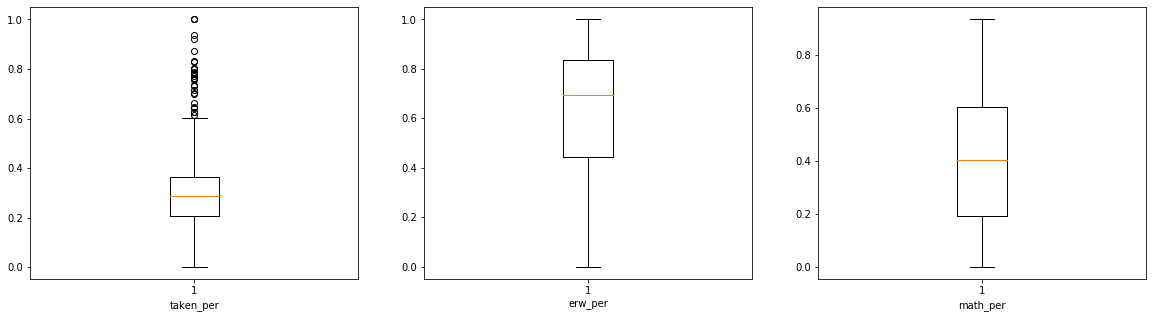

In [48]:
fig, (taken_per, erw_per, math_per) = plt.subplots(1, 3,figsize=(20,5))

taken_per.boxplot(df['taken_per']);
taken_per.set_xlabel('taken_per');

erw_per.boxplot(df['erw_per']);
erw_per.set_xlabel('erw_per')


math_per.boxplot(df['math_per']);
math_per.set_xlabel('math_per');

Taken_per has many outliers on the top. Take a closer look. Method credit to [**here**](https://datascience.stackexchange.com/questions/54808/how-to-remove-outliers-using-box-plot)


In [49]:
#############################
taken_per_q1 = df['taken_per'].quantile(0.25)
taken_per_q3 = df['taken_per'].quantile(0.75)
taken_per_iqr = taken_per_q3 -taken_per_q1

mask = (df['taken_per'] > (taken_per_q3 + 1.5 * taken_per_iqr))
df[mask][['num_student','num_taken','taken_per']].sort_values(by='num_student')#.head(10)

,num_student,num_taken,taken_per
221,2.0,2.0,1.000000
414,3.0,3.0,1.000000
64,3.0,3.0,1.000000
233,5.0,4.0,0.800000
13,6.0,5.0,0.833333
452,7.0,5.0,0.714286
428,10.0,7.0,0.700000
331,37.0,27.0,0.729730
488,65.0,42.0,0.646154
229,75.0,69.0,0.920000


Take a look of the relations between each percentage value

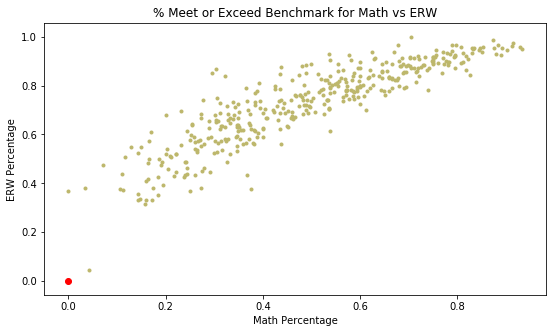

In [50]:
##############################
plt.figure(figsize=(9,5))

plt.scatter(df['math_per'],df['erw_per'],c = 'darkkhaki',marker= '.');
plt.plot(0,0,c = 'r', marker = 'o');

plt.title('% Meet or Exceed Benchmark for Math vs ERW');
plt.xlabel('Math Percentage');
plt.ylabel('ERW Percentage');

It clearly shows that Math and ERW are highly correalted.

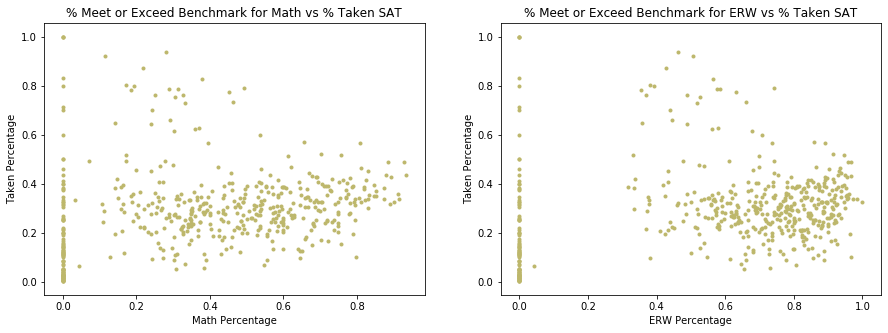

In [51]:
#######################
fig,(math_taken,erw_taken) = plt.subplots(1,2,figsize = (15,5))



math_taken.scatter(df['math_per'],df['taken_per'],c = 'darkkhaki',marker= '.');
erw_taken.scatter(df['erw_per'],df['taken_per'],c = 'darkkhaki',marker= '.');



math_taken.set_title('% Meet or Exceed Benchmark for Math vs % Taken SAT');
erw_taken.set_title('% Meet or Exceed Benchmark for ERW vs % Taken SAT');

math_taken.set_xlabel('Math Percentage');
math_taken.set_ylabel('Taken Percentage');

erw_taken.set_xlabel('ERW Percentage');
erw_taken.set_ylabel('Taken Percentage');

It clearly shows that taken percentage is not correlated with either math_per nor erw_oer, also, there is a strange pattern on both plots. It might be the result of outliers.

### Visualize the percentage on map

In [53]:
path = "../data/shape file/California_School_District_Areas_2018-19-shp"

ca_geo = geopandas.read_file(path)

In [54]:
ca_geo['CDCode'] = ca_geo['CDCode'].astype('float')

In [55]:
data_merge = ca_geo.merge(df, left_on = 'CDCode', right_on = 'code')

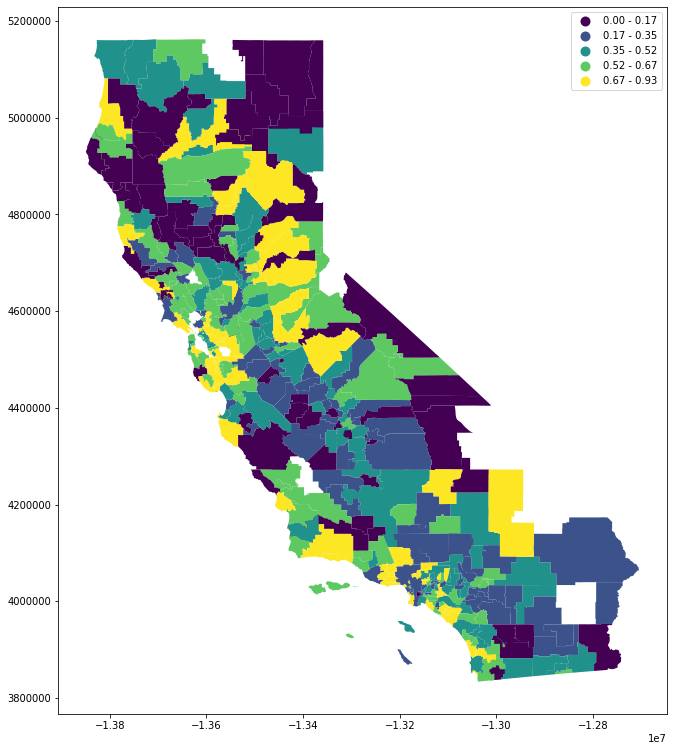

In [63]:
data_merge.plot(column='math_per',legend=True, figsize = (13,13) ,scheme="Quantiles");

## Conclusions and Recommendations

Students who lived high income areas tend to have higher SAT scores. But more data need to prove.